# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

df = pd.read_csv('data/human_body_temperature.csv')

### Q1: Is the distribution of body temperatures normal?
not a requirement for CLT to hold (read CLT carefully), but good to check to give some peace of mind that the population may also be normally distributed if it is assumed that this sample is representative of the populatio 

implementation ideas: 
- check the shape of its histogram
- compare with simulated normal distribution

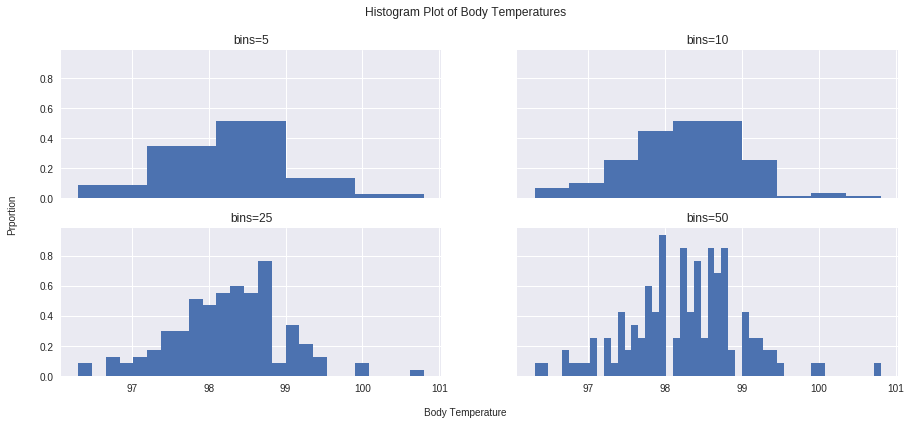

In [2]:
# plot histogram
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
bin_size = [5,10,25,50]
for ax,i in zip(fig.get_axes(),range(4)):
    ax.hist(df.temperature,bins=bin_size[i],normed=True)
    ax.set_title('bins='+str(bin_size[i]))
fig.text(0.5,0.04, "Body Temperature", ha="center", va="center")
fig.text(0.08,0.5, "Prportion", ha="center", va="center", rotation=90)
fig.suptitle('Histogram Plot of Body Temperatures')
plt.show()

based on the histogram plot, the shape simialr to normal distrition with small bin size, but with the incereased bin size, it seems become non-symmetric, further check the empricial cumulative distribution function (compare with theorectical normal distribution with the sample mean and std)

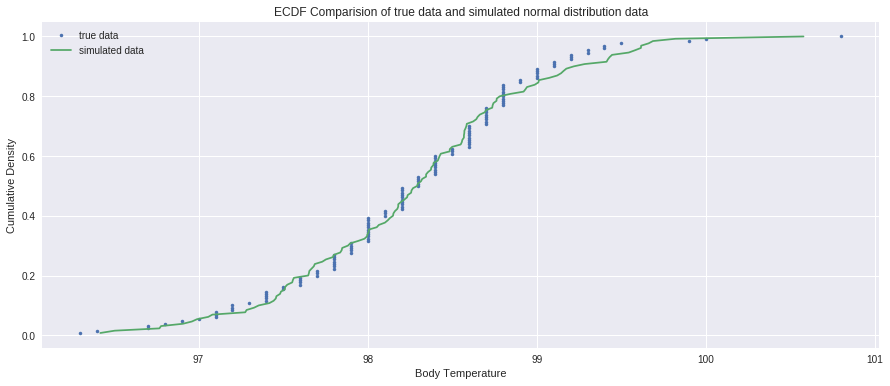

In [3]:
# plot ecdf for the sample
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys
x,y = ecdf(df.temperature)
_ = plt.plot(x, y, marker='.',linestyle='none',label='true data');
# plot simulated normal distribution data
bt_mean = np.mean(df.temperature)
bt_std = np.std(df.temperature)
bt_size = df.shape[0]
np.random.seed(23)
simulated_bt = np.random.normal(bt_mean, bt_std, size=bt_size)
x_sim,y_sim = ecdf(simulated_bt)
_ = plt.plot(x_sim, y_sim,label='simulated data')
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Cumulative Density')
_ = plt.legend()
_ = plt.title('ECDF Comparision of true data and simulated normal distribution data')
plt.show()

from the ECDF comparision plot, it seems that the real data of body temperature align quite well with the simulated normal distribution, so it is very likely the body temperature data is normally distributed

### Q2: Is the sample size large? Are the observations independent?
sample size is a condition for the CLT, check before use the following statistical tests

In [4]:
bt_size = df.shape[0]
print('sample size is '+str(bt_size))

sample size is 130


as sample size is larger than 30, it can be considered as a large sample size; and the observations are independent for this data. Thus, matching the assumption of CLT

### Q3: Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
    - This would be one-sample test as it tests whehter the mean of a normally distributed population is different from a specific values, only one population invoved in this case
- In this situation, is it appropriate to use the  tt  or  zz  statistic?
    - In this case, although the sample size is larger than 30, matching the condition for using z statistics, but as the population standard deviation is unknown (though we could assume that is equal to sample standard deviation as the sample is large enough but not desirable), using t statistic is more appropriate
- Now try using the other test. How is the result be different? Why?
    - p value for the two test is very cloase, suggesting that when sample size is large, t test gives similar result to z test, and the difference may due to the fluctuations that may occur in T-tests sample variances that do not exist in Z-tests

In [5]:
# H0: the true poplution mean is 98.6; H1: the true population mean is not 98.6; critical value is 0.005
# calculate the t score
bt_mean = np.mean(df.temperature.values)
bt_size = df.shape[0]
bt_std = np.sqrt(np.sum((df.temperature.values-bt_mean)**2)/(bt_size-1))
t = (bt_mean-98.6)/(bt_std/np.sqrt(bt_size))
degree_freedom = bt_size-1 # degree of freedom
# get p value
from scipy import stats
p = 2*stats.t.cdf(t,df=degree_freedom) # as t<0, otherwise 2*(1-stats.t.cdf(t,df))
print("t = " + str(t))
print("p = " + str(p))

t = -5.45482329236
p = 2.41063204156e-07


as p < 0.05, thus reject H0, the true population mean is not 98.6 based on this set of data

In [6]:
# try the other test (z test) according to the requirement of the question
# derive the population standard deviation from sample
population_std = np.std(df.temperature.values)
z = (bt_mean-98.6)/(population_std/np.sqrt(bt_size))
# get p value
p = 2*stats.norm.cdf(z) # as z<0, otherwise 2*(1-stats.norm.cdf(z))
print("t = " + str(t))
print("p = " + str(p))

t = -5.45482329236
p = 4.35231516587e-08


### Q4: Draw a small sample of size 10 from the data and repeat both tests.
- Which one is the correct one to use?
    - should use t test as the sample size is smaller than 30, and population standard deviation is unknown
- What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?
    - p value from z test is larger than t test, and the error is probably coming from the wrong estimation of the population standard deviation because of the small sample size, thus t test is more appropriate with small sample size 

In [7]:
# draw 10 samples from data
np.random.seed(42)
bt_10 = np.random.choice(df.temperature,size=10)
print(bt_10)

[ 98.   98.8  97.8  97.   97.7  98.3  98.   97.9  99.   98. ]


In [8]:
# t statistic
mean_10 = np.mean(bt_10)
size_10 = 10
std_10 = np.sqrt(np.sum((bt_10-bt_mean)**2)/(bt_size-1))
t = (mean_10-98.6)/(std_10/np.sqrt(size_10))
degree_freedom = bt_size-1 # degree of freedom
# get p value
from scipy import stats
p = 2*stats.t.cdf(t,df=degree_freedom) if t<0 else 2*(1-stats.t.cdf(t,df=degree_freedom))
print("t = " + str(t))
print("p = " + str(p))

t = -10.9712420174
p = 3.44569421682e-20


In [9]:
# z statistic
population_std = np.std(bt_10)
z = (mean_10-98.6)/(population_std/np.sqrt(size_10))
# get p value
p = 2*stats.norm.cdf(z) if t<0 else 2*(1-stats.norm.cdf(z))
print("t = " + str(t))
print("p = " + str(p))

t = -10.9712420174
p = 0.0011110604539


### Q5: At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [10]:
# generate boostrap replicates and get mean for each sample
def boostrap_replicates(data, func, rep):
    return [func(np.random.choice(data,len(data))) for i in range(rep)]
# generate 1000 boostrap replicate data and collect each mean
replicates = boostrap_replicates(df.temperature.values, np.mean, 1000)
conf_int = np.percentile(replicates, [0.5,99.5])
print('99% confidence interval =', conf_int, 'F')

99% confidence interval = [ 98.08458462  98.41081538] F


### Q6: Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
    - use the two-sample t test as the population standard deviation is unknown

In [11]:
# get the female data and male data
female = df.loc[df.gender=='F','temperature'].values
male = df.loc[df.gender=='M','temperature'].values

In [12]:
# calculate t statistic
size_f = len(female)
mean_f = np.mean(female)
std_f = np.sqrt(np.sum((female-mean_f)**2)/(size_f-1))
size_m = len(male)
mean_m = np.mean(male)
std_m = np.sqrt(np.sum((male-mean_m)**2)/(size_m-1))
t = (mean_f-mean_m)/np.sqrt(std_f**2/size_f+std_m**2/size_m)
degree_freedom = size_f-1+size_m-1
# calculate p values
p = 2*(1-stats.t.cdf(t,df=degree_freedom)) if t>0 else 2*(stats.t.cdf(t,df=degree_freedom))
print("t = " + str(t))
print("p = " + str(p))

t = 2.28543453817
p = 0.0239318831224


p>0.005(critical value), so there is not significant difference between the normal temperature of females and males